In [4]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
import random
from math import sqrt

# 1. Решаем прямую задачу Хищник-Жертва

In [276]:
params = dict()
params["a1"] = 2.
params["gamma1"] = 0.35
params["a2"] = 2.15
params["gamma2"] = 0.175

In [277]:
def Du(x, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ params["a1"]*x[0] -params["gamma1"]*x[0]*x[1] ,
                  -params["a2"]*x[1] + params["gamma2"]*x[0]*x[1] ])

In [278]:
t = np.linspace(0,20,10000)
x0 = np.array([5,5])
x, _ = integrate.odeint(Du,x0,t,full_output=True)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

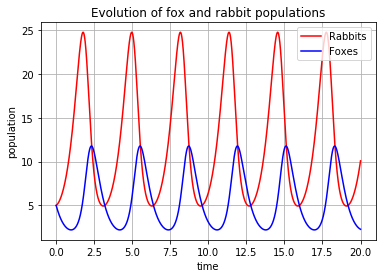

In [279]:
rabbits, foxes = x.T
f1 = plt.figure()
plt.plot(t,rabbits,'r-',label="Rabbits")
plt.plot(t,foxes,'b-',label="Foxes")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

(10000,)

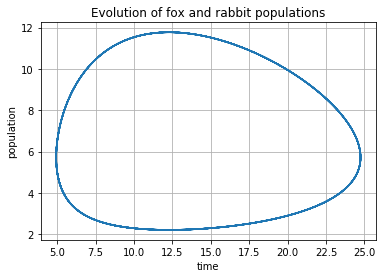

In [280]:
rabbits, foxes = x.T
f1 = plt.figure()
plt.plot(rabbits,foxes)
plt.grid()
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')
rabbits.shape

In [281]:
def observation(trueU,trueV,mean = 0,var=0.5,num_samples = 11):
    obsU = []
    obsV = []
    jdx = int(1000/(num_samples - 1))
    for idx in range(num_samples):
        obsU.append(trueU[idx*jdx] + np.random.normal(mean,var))
        obsV.append(trueV[idx*jdx] +  np.random.normal(mean,var))
    return obsU,obsV
    
        

22


Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

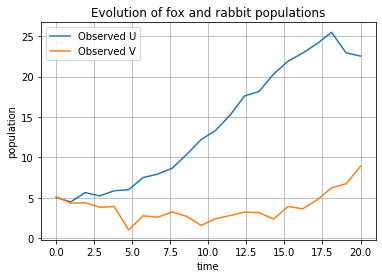

In [282]:
obsU,obsV = observation(rabbits,foxes,num_samples = 22)
time = np.linspace(0,20,22)
print(len(obsU))
plt.plot(time,obsU,label="Observed U")
plt.plot(time,obsV,label="Observed V")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

In [283]:
def Function(U,V,params):
    return U*(params[0] - params[1]*V), -V*(params[2]-params[3]*U)

In [284]:
def SquareError(theta, Y, num_samples):
    deltat = 2/(num_samples-1)
    return(sum([(Y[0][i] - Y[0][i-1] - Function(Y[0][i-1], Y[1][i-1], theta)[0]*deltat)**2 for i in range(1, num_samples)]) + sum([(Y[1][i] - Y[1][i-1] - Function(Y[0][i-1], Y[1][i-1], theta)[1]*deltat)**2 for i in range(1, num_samples)]))


def GradientSquareError(Y, theta, num_samples = 11):
    # Частные производные квадратичной функции ошибкок
    deltat = 2/(num_samples-1)
    a = -2*sum([(Y[0][i] - Y[0][i-1] - Function(Y[0][i-1], Y[1][i-1], theta)[0]*deltat)*deltat*Y[0][i-1] for i in range(1,len(Y[0]))])
    b = +2*sum([(Y[0][i] - Y[0][i-1] - Function(Y[0][i-1], Y[1][i-1], theta)[0]*deltat)*deltat*Y[0][i-1]*Y[1][i-1] for i in range(1,len(Y[0]))])
    c = +2*sum([(Y[1][i] - Y[1][i-1] - Function(Y[0][i-1], Y[1][i-1], theta)[1]*deltat)*deltat*Y[1][i-1] for i in range(1,len(Y[0]))])
    d = -2*sum([(Y[1][i] - Y[1][i-1] - Function(Y[0][i-1], Y[1][i-1], theta)[1]*deltat)*deltat*Y[1][i-1]*Y[0][i-1] for i in range(1,len(Y[0]))])
    return(a,b,c,d)

In [285]:
def GradientDescend(obs,theta0,num_samples,pas=10**(-3)):
    theta = theta0
    error = 100
    while error > pas:
        grad = np.array(GradientSquareError(obs,theta,num_samples))
        error = np.dot(grad.T,grad)
        alpha = 1
        c,rho = 0.1,0.9
        while  SquareError([theta[i] - alpha*grad[i] for i in range(len(grad))], obs, num_samples)  > (SquareError(theta, obs, num_samples) - c * alpha * error):                                                 #cette boucle sert à chercher le meilleur alpha (ie : l'argmax de S(theta - alpha*gradient(S)),
            alpha = alpha * rho
        theta = [theta[i] - alpha*grad[i] for i in range(len(grad))]   
    return(theta)   

In [286]:
theta = GradientDescend(observation(rabbits,foxes,num_samples=11),[1.5, 0.5, 3.5, 0.5],11)

In [287]:
print("predicted values:",theta)
print("true values:",params.values())
print("absolute error:",np.abs(np.array(list(params.values())) - theta))

predicted values: [2.292431241685857, 0.5246989803156272, 2.127634752505846, 0.20254631988539648]
true values: dict_values([2.0, 0.35, 2.15, 0.175])
absolute error: [0.29243124 0.17469898 0.02236525 0.02754632]


In [288]:
new_params = dict()
new_params["a1"] = theta[0]
new_params["gamma1"] = theta[1]
new_params["a2"] = theta[2]
new_params["gamma2"] = theta[3]


In [289]:
def Du_1(x, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ new_params["a1"]*x[0] -new_params["gamma1"]*x[0]*x[1] ,
                  -new_params["a2"]*x[1] + new_params["gamma2"]*x[0]*x[1] ])

In [290]:
t = np.linspace(0,20,10000)
x0 = np.array([5,3])
x, _ = integrate.odeint(Du_1,x0,t,full_output=True)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

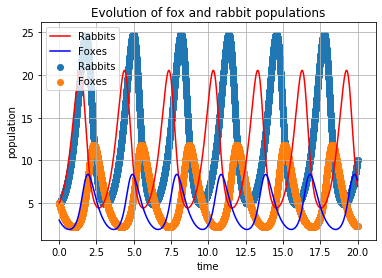

In [291]:
rabbits_1, foxes_1 = x.T
f1 = plt.figure()
plt.plot(t,rabbits_1,'r-',label="Rabbits")
plt.plot(t,foxes_1,'b-',label="Foxes")
plt.scatter(t,rabbits,label="Rabbits")
plt.scatter(t,foxes,label="Foxes")
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

In [293]:
print("error between functions u and u_pred:",(np.array(rabbits_1)-np.array(rabbits)).sum())
print("error between functions u and u_pred:",(np.array(foxes_1)-np.array(foxes)).sum())

error between functions u and u_pred: -13243.294641130571
error between functions u and u_pred: -12759.604976976038
